In [1]:
from pyNBS import consensus_clustering as cc
from pyNBS import pyNBS_plotting as plot
import pandas as pd
import numpy as np
from IPython.display import Image

In [2]:
run_pyNBS_params = {'verbose' : True,
                    ##### Path for Ovarian #####
                    'sm_data_file' : '/cellar/users/jkhuang/Data/Projects/pyNBS/Data/TCGA_sm_data/processed/OV_sm_data_filt.txt',
                    'network_path' : '/cellar/users/jkhuang/Data/Projects/pyNBS/Data/Network_Data/Network_Files/HumanNet90_Symbol.txt',
                    
                    ##### Path for Uterine #####
                    #'sm_data_file' : '/cellar/users/jkhuang/Data/Projects/pyNBS/Data/TCGA_sm_data/processed/UCEC_sm_data.txt',
                    #'network_path' : '/cellar/users/jkhuang/Data/Projects/pyNBS/Data/Network_Data/Network_Files/STRING_Symbol.txt',
                    
                    'mut_filetype' : 'list',
                    'mut_filedelim' : '\t',
                    'net_filedelim' : '\t',
                    'degree_preserved_shuffle' : False,
                    'node_label_shuffle' : False,
                    'regularize_network' : True,
                    'reg_net_gamma' : 0.01,
                    'k_nearest_neighbors' : 11,
                    'save_knn_glap' : None,
                    'regularization_network_graph_laplacian_file' : None,
                    'niter' : 100, # 1000 default
                    'calculate_propagation_kernel' : True,
                    'propagation_kernel_file' : None,
                    'save_H' : None,
                    'consensus_cluster' : True,
                    'assign_clusters' : True,
                    'save_co_cluster_matrix' : '/cellar/users/t1jia/pyNBS/results/OV_co_cluster_matrix.csv',
                    'save_cluster_assignments' : '/cellar/users/t1jia/pyNBS/results/OV_cluster_assignment.csv',
                    'plot_co_cluster_map' : True,
                    'plot_title' : 'Ovarian Consensus Cluster Map',
                    'save_co_cluster_map' : '/cellar/users/t1jia/pyNBS/results/OV_co_cluster.png',
                    'save_km_plot' : '/cellar/users/t1jia/pyNBS/results/OV_KM_plot.png'
                    }

In [3]:
NBS_cluster_assign=pd.read_csv('/cellar/users/t1jia/pyNBS/results/OV_cluster_assignment.csv',sep=',',index_col=0)
NBS_cc_table = pd.read_csv('/cellar/users/t1jia/pyNBS/results/OV_co_cluster_matrix.csv',index_col=0)
NBS_cc_linkage = np.load('/cellar/users/t1jia/pyNBS/results/OV_cc_linkage.npy')

In [4]:
#Cluster assignments
ori_assin_table = pd.read_table('/cellar/users/t1jia/pyNBS/Hofree_NBS_paper_results/Paper_OV_NBS_Results.csv',sep=',',index_col=0)
cluster_assign = pd.concat([ori_assin_table.iloc[:,0], NBS_cluster_assign], axis=1).dropna(axis=0,how='any').astype(int)
ori_paper_cluster_assign = cluster_assign.iloc[:,0]
NBS_cluster_assign = cluster_assign.iloc[:,1].astype(int)

In [5]:
# Plot Consensus Cluster Map
if run_pyNBS_params['plot_co_cluster_map']:
    NBS_cluster_assign_cmap = plot.cluster_color_assign(NBS_cluster_assign, name='pyNBS Cluster Assignment')
    ori_paper_cluster_assign_cmap = plot.cluster_color_assign(ori_paper_cluster_assign, name='Original Paper Cluster Assignment')
    plot.plot_cc_map(NBS_cc_table, NBS_cc_linkage, title=run_pyNBS_params['plot_title'], row_color_map=ori_paper_cluster_assign_cmap, 
                     col_color_map=NBS_cluster_assign_cmap, save_path=run_pyNBS_params['save_co_cluster_map'])
    if run_pyNBS_params['verbose']:
        print 'Consensus Clustering map saved'

/cellar/users/t1jia/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Consensus Clustering map saved


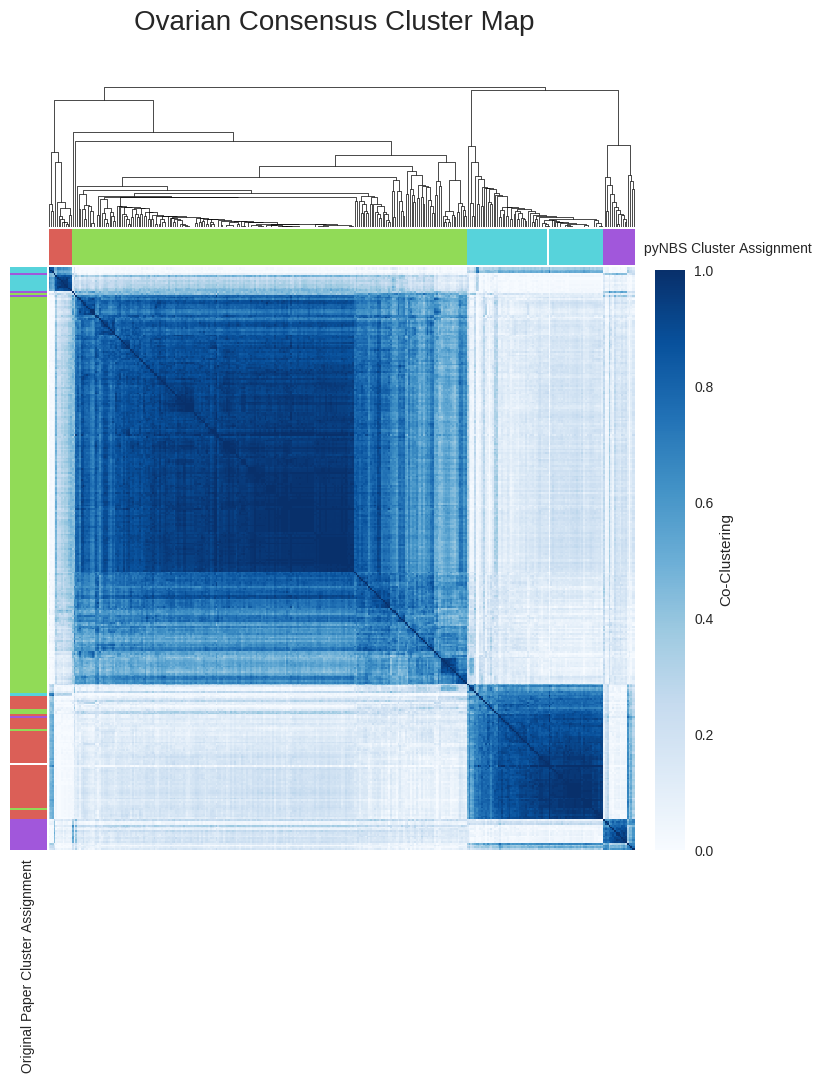

In [6]:
Image(filename = run_pyNBS_params['save_co_cluster_map'], width=600, height=600)